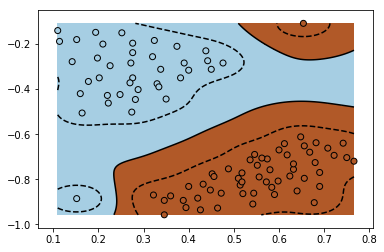

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 23 10:14:36 2017

@author: pedroa
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm

# Cargar el dataset
data = pd.read_csv('BasesDatos/csv/dataset1.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# Entrenar el modelo SVM
svm_model = svm.SVC(kernel='rbf',C=200,gamma=200)
svm_model.fit(X, y)

# Representar los puntos
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=100, cmap=plt.cm.Paired, edgecolors='black')

# Representar el hiperplano separador
plt.axis('tight')
# Extraer límites
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Crear un grid con todos los puntos y obtener el valor Z devuelto por la SVM
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Hacer un plot a color con los resultados
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

plt.show()
